In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,693700,0,0,claytonbeeney,791,55,-1,1.0,"October 9, 2021",This is a game just for those STEM kids who co...
1,693700,0,0,76561198218009729,153,95,1,32.3,"June 24, 2021","As someone who enjoys coding, I like this game..."
2,693700,2,0,RuslanT007,326,70,1,73.1,"May 11, 2021",This is such a great engineering puzzle game!I...
3,693700,1,0,mjmusante,45,3,1,5.0,"April 26, 2021",First: this DOES work on MacOS Catalina. There...
4,693700,0,0,76561197972513604,219,4,1,5.3,"February 21, 2021",Fun game if you like chill puzzles. I don't ha...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,-1,1.0,"October 9, 2021",This is a game just for those STEM kids who co...
1,0,0,1,32.3,"June 24, 2021","As someone who enjoys coding, I like this game..."
2,2,0,1,73.1,"May 11, 2021",This is such a great engineering puzzle game!I...
3,1,0,1,5.0,"April 26, 2021",First: this DOES work on MacOS Catalina. There...
4,0,0,1,5.3,"February 21, 2021",Fun game if you like chill puzzles. I don't ha...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 9, 2021",This is a game just for those STEM kids who co...,0,0,1.0,-1
1,"June 24, 2021","As someone who enjoys coding, I like this game...",0,0,32.3,1
2,"May 11, 2021",This is such a great engineering puzzle game!I...,2,0,73.1,1
3,"April 26, 2021",First: this DOES work on MacOS Catalina. There...,1,0,5.0,1
4,"February 21, 2021",Fun game if you like chill puzzles. I don't ha...,0,0,5.3,1
5,"February 2, 2021",An interesting programming game. The most inte...,0,0,107.9,1
6,"January 25, 2021",Interesting constraints on a lot of challengin...,0,0,14.0,1
7,"January 6, 2021",Excellent puzzle game with outstanding complex...,2,0,9.0,1
8,"January 5, 2021","This is a negative review, because it does not...",1,0,3.0,-1
9,"January 3, 2021",Tough puzzles but very rewarding and up my all...,1,0,40.1,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  123 non-null    object 
 1   Review_Text     123 non-null    object 
 2   Num_Helpful     123 non-null    int64  
 3   Num_Funny       123 non-null    int64  
 4   Hours_Played    123 non-null    float64
 5   Recommend       123 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.9+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_32588/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 9, 2021",This is a game just for those STEM kids who co...,0,0,1.0,-1,1633737600
1,"June 24, 2021","As someone who enjoys coding, I like this game...",0,0,32.3,1,1624492800
2,"May 11, 2021",This is such a great engineering puzzle game!I...,2,0,73.1,1,1620691200
3,"April 26, 2021",First: this DOES work on MacOS Catalina. There...,1,0,5.0,1,1619395200
4,"February 21, 2021",Fun game if you like chill puzzles. I don't ha...,0,0,5.3,1,1613865600


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_32588/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 9, 2021",This is a game just for those STEM kids who co...,0,0,1.0,-1,1633737600,2701
1,"June 24, 2021","As someone who enjoys coding, I like this game...",0,0,32.3,1,1624492800,2686
2,"May 11, 2021",This is such a great engineering puzzle game!I...,2,0,73.1,1,1620691200,2679
3,"April 26, 2021",First: this DOES work on MacOS Catalina. There...,1,0,5.0,1,1619395200,2677
4,"February 21, 2021",Fun game if you like chill puzzles. I don't ha...,0,0,5.3,1,1613865600,2668


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 9, 2021",This is a game just for those STEM kids who co...,0,0,1.0,-1,1633737600,2701
1,"June 24, 2021","As someone who enjoys coding, I like this game...",0,0,32.3,1,1624492800,2686
2,"May 11, 2021",This is such a great engineering puzzle game!I...,2,0,73.1,1,1620691200,2679
3,"April 26, 2021",First: this DOES work on MacOS Catalina. There...,1,0,5.0,1,1619395200,2677
4,"February 21, 2021",Fun game if you like chill puzzles. I don't ha...,0,0,5.3,1,1613865600,2668


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2701,"October 9, 2021",This is a game just for those STEM kids who co...
1,2686,"June 24, 2021","As someone who enjoys coding, I like this game..."
2,2679,"May 11, 2021",This is such a great engineering puzzle game!I...
3,2677,"April 26, 2021",First: this DOES work on MacOS Catalina. There...
4,2668,"February 21, 2021",Fun game if you like chill puzzles. I don't ha...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2524,"May 21, 2018",5
1,2524,"May 22, 2018",8
2,2524,"May 23, 2018",2
3,2525,"May 24, 2018",2
4,2525,"May 25, 2018",2
...,...,...,...
92,2668,"February 21, 2021",1
93,2677,"April 26, 2021",1
94,2679,"May 11, 2021",1
95,2686,"June 24, 2021",1


<AxesSubplot:>

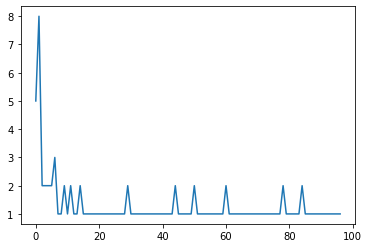

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

123

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.268041237113402

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2524,15
1,2525,10
2,2526,3
3,2529,1
4,2530,6
...,...,...
62,2668,1
63,2677,1
64,2679,1
65,2686,1


<AxesSubplot:>

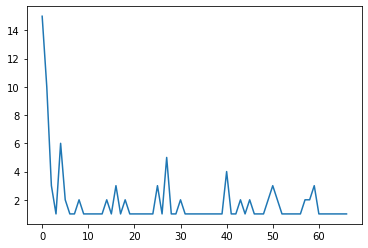

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

123

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

1.835820895522388

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 9, 2021",This is a game just for those STEM kids who co...,0,0,1.0,-1,1633737600,2701
1,"June 24, 2021","As someone who enjoys coding, I like this game...",0,0,32.3,1,1624492800,2686
2,"May 11, 2021",This is such a great engineering puzzle game!I...,2,0,73.1,1,1620691200,2679
3,"April 26, 2021",First: this DOES work on MacOS Catalina. There...,1,0,5.0,1,1619395200,2677
4,"February 21, 2021",Fun game if you like chill puzzles. I don't ha...,0,0,5.3,1,1613865600,2668


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2524,65
1,2525,19
2,2526,2
3,2529,1
4,2530,79
...,...,...
62,2668,0
63,2677,1
64,2679,2
65,2686,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2524,30,0,2.0,4.333333
2525,11,0,0.0,1.900000
2526,2,0,0.0,0.666667
2529,1,1,1.0,1.000000
2530,51,0,5.5,13.166667
...,...,...,...,...
2668,0,0,0.0,0.000000
2677,1,1,1.0,1.000000
2679,2,2,2.0,2.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

307

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

2.4959349593495936

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2524,11
1,2525,4
2,2526,0
3,2529,0
4,2530,0
...,...,...
62,2668,0
63,2677,0
64,2679,0
65,2686,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2524,8,0,0.0,0.733333
2525,4,0,0.0,0.400000
2526,0,0,0.0,0.000000
2529,0,0,0.0,0.000000
2530,0,0,0.0,0.000000
...,...,...,...,...
2668,0,0,0.0,0.000000
2677,0,0,0.0,0.000000
2679,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

25

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.2032520325203252

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2524,190.2
1,2525,113.4
2,2526,76.8
3,2529,14.3
4,2530,141.0
...,...,...
62,2668,5.3
63,2677,5.0
64,2679,73.1
65,2686,32.3


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2524,76.7,1.6,5.1,12.68
2525,26.8,0.9,8.6,11.34
2526,50.5,6.1,20.2,25.60
2529,14.3,14.3,14.3,14.30
2530,81.0,5.9,13.8,23.50
...,...,...,...,...
2668,5.3,5.3,5.3,5.30
2677,5.0,5.0,5.0,5.00
2679,73.1,73.1,73.1,73.10


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

2817.4999999999995

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

22.90650406504065

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2524,1.000000
1,2525,0.800000
2,2526,1.000000
3,2529,1.000000
4,2530,0.666667
...,...,...
62,2668,1.000000
63,2677,1.000000
64,2679,1.000000
65,2686,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2524,1,1,1.0,1.000000
2525,1,-1,1.0,0.800000
2526,1,1,1.0,1.000000
2529,1,1,1.0,1.000000
2530,1,-1,1.0,0.666667
...,...,...,...,...
2668,1,1,1.0,1.000000
2677,1,1,1.0,1.000000
2679,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

89

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.7235772357723578

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 9, 2021",This is a game just for those STEM kids who co...,0,0,1.0,-1,1633737600,2701
1,"June 24, 2021","As someone who enjoys coding, I like this game...",0,0,32.3,1,1624492800,2686
2,"May 11, 2021",This is such a great engineering puzzle game!I...,2,0,73.1,1,1620691200,2679
3,"April 26, 2021",First: this DOES work on MacOS Catalina. There...,1,0,5.0,1,1619395200,2677
4,"February 21, 2021",Fun game if you like chill puzzles. I don't ha...,0,0,5.3,1,1613865600,2668


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 9, 2021",This is a game just for those STEM kids who co...,0,0,0.001996,0.0,1.000000,2701
1,"June 24, 2021","As someone who enjoys coding, I like this game...",0,0,0.091246,1.0,0.913500,2686
2,"May 11, 2021",This is such a great engineering puzzle game!I...,2,0,0.207585,1.0,0.877930,2679
3,"April 26, 2021",First: this DOES work on MacOS Catalina. There...,1,0,0.013402,1.0,0.865804,2677
4,"February 21, 2021",Fun game if you like chill puzzles. I don't ha...,0,0,0.014257,1.0,0.814066,2668
...,...,...,...,...,...,...,...,...
118,"May 21, 2018","Great, complicated, coding/design/puzzle game ...",2,0,0.031936,1.0,0.000000,2524
119,"May 21, 2018",I just completed a discrete mathematics course...,2,8,0.027089,1.0,0.000000,2524
120,"May 21, 2018",Fun little game. Art and music are great. Puzz...,0,0,0.008269,1.0,0.000000,2524
121,"May 21, 2018",Fun little game. Art and music are great. Puzz...,0,0,0.008269,1.0,0.000000,2524


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_32588/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 9, 2021",This is a game just for those STEM kids who co...,0,0,0.001996,0.0,1.000000,2701
1,"June 24, 2021","As someone who enjoys coding, I like this game...",0,0,0.091246,1.0,0.913500,2686
2,"May 11, 2021",This is such a great engineering puzzle game!I...,2,0,0.207585,1.0,0.877930,2679
3,"April 26, 2021",First: this DOES work on MacOS Catalina. There...,1,0,0.013402,1.0,0.865804,2677
4,"February 21, 2021",Fun game if you like chill puzzles. I don't ha...,0,0,0.014257,1.0,0.814066,2668
5,"February 2, 2021",An interesting programming game. The most inte...,0,0,0.306815,1.0,0.798707,2665
6,"January 25, 2021",Interesting constraints on a lot of challengin...,0,0,0.039065,1.0,0.792239,2664
7,"January 6, 2021",Excellent puzzle game with outstanding complex...,2,0,0.024808,1.0,0.776880,2661
8,"January 5, 2021","This is a negative review, because it does not...",1,0,0.007699,0.0,0.776071,2661
9,"January 3, 2021",Tough puzzles but very rewarding and up my all...,1,0,0.113487,1.0,0.774454,2661


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2524    [Pretty steep difficutly spike, but the reward...
2525    [Tickled my brain in the perfect way!, Overall...
2526    [Prime Mover is a great logical puzzle game. I...
2529                  [Great, thought-provoking puzzles.]
2530    [Prime Mover has me thoroughly impressed. It d...
2531    [If TIS-100 and SpaceChem had a baby, Prime Mo...
2533    [Prime Mover is really well done, I love the a...
2534                                [Good Zachlike game.]
2535    [If you like 'Zach-like' open ended puzzle gam...
2537    [One of the best puzzle game i have played so ...
2538    [Contains a rather challenging set of low-leve...
2542    [Thumbs up for fans of Infinifactory, Space Ch...
2543    [Really good game. I like it better than Shenz...
2544    [A puzzle game which is on par with the Zachtr...
2549    [Extremely difficult just because the tools yo...
2550    [Very challenging but highly polished and a lo...
2551    [Wow this game is hard. Excellent little cutsc..

In [52]:
# storing data in JSON format
df_text_list.to_json('primemover_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('primemover_text.json')
print(game_text)

           name  index                                               data
0   Review_Text   2524  [Pretty steep difficutly spike, but the reward...
1   Review_Text   2525  [Tickled my brain in the perfect way!, Overall...
2   Review_Text   2526  [Prime Mover is a great logical puzzle game. I...
3   Review_Text   2529                [Great, thought-provoking puzzles.]
4   Review_Text   2530  [Prime Mover has me thoroughly impressed. It d...
5   Review_Text   2531  [If TIS-100 and SpaceChem had a baby, Prime Mo...
6   Review_Text   2533  [Prime Mover is really well done, I love the a...
7   Review_Text   2534                              [Good Zachlike game.]
8   Review_Text   2535  [If you like 'Zach-like' open ended puzzle gam...
9   Review_Text   2537  [One of the best puzzle game i have played so ...
10  Review_Text   2538  [Contains a rather challenging set of low-leve...
11  Review_Text   2542  [Thumbs up for fans of Infinifactory, Space Ch...
12  Review_Text   2543  [Really good g

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('primemover_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_32588/240774496.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('primemover_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_32588/3714258665.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('primemover_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])